In [1]:
from google.colab import drive
drive.mount('/content/drive')
# ディレクトリの移動
%cd drive/MyDrive/nlp100
%pwd

Mounted at /content/drive
/content/drive/MyDrive/nlp100


'/content/drive/MyDrive/nlp100'

## 60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [2]:
# gensimを使用
from gensim.models import KeyedVectors

# バイナリファイルの読み込み
model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)

# 特定の単語のベクトルを取得
vector = model["United_States"]
print(vector)


[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982

## 61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ

In [3]:
import numpy as np

united_states_vector = model["United_States"]
us_vector = model["U.S."]

# ノルム
united_states_vector_norm = np.linalg.norm(united_states_vector)
us_vector_norm = np.linalg.norm(us_vector)

# 内積
dot = np.dot(united_states_vector, us_vector)

cos_sim = (dot)/(united_states_vector_norm * us_vector_norm)

print(cos_sim)

0.7310775


## 62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [4]:
# docsのload_word2vec_formatを見てメソッドを確認
model.most_similar("United_States", topn=20)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370987892151),
 ('United_Sates', 0.7400724291801453),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.601906955242157),
 ('IG_TEC_;)_COUNTRY', 0.5827383399009705),
 ('United_Kingdom', 0.5807129144668579),
 ('country', 0.570611298084259),
 ('IG_HCR_;)_COUNTRY', 0.5631535649299622),
 ('IG_FSV_;)_COUNTRY', 0.5449064373970032),
 ('IG_IGS_;)_COUNTRY', 0.5444340705871582),
 ('IG_BNK_;)_COUNTRY', 0.544411301612854),
 ('world', 0.5440480709075928),
 ('IG_CGS_;)_COUNTRY', 0.5421634912490845),
 ('Great_Britain', 0.5360912084579468)]

##63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [5]:
spain = model["Spain"]
madrid = model["Madrid"]
athens = model["Athens"]

result = spain - madrid + athens
model.most_similar(result, topn=10)

[('Athens', 0.7528455853462219),
 ('Greece', 0.6685472130775452),
 ('Aristeidis_Grigoriadis', 0.5495778322219849),
 ('Ioannis_Drymonakos', 0.5361457467079163),
 ('Greeks', 0.5351786017417908),
 ('Ioannis_Christou', 0.5330225825309753),
 ('Hrysopiyi_Devetzi', 0.5088489055633545),
 ('Iraklion', 0.5059264302253723),
 ('Greek', 0.5040615797042847),
 ('Athens_Greece', 0.5034108757972717)]

## 64. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [6]:
# # この辺は実行が長くなるのでコメントアウトしておくが、条件分岐でpyファイルを実行する/しないシェルスクリプトを書きたい気持ちがある
# # 一旦前回のデータを消してからやる
# ! sudo rm analogy.txt
# ! sudo rm analogy_most_similar_word_added.txt

In [7]:
# import requests
# analogy = requests.get("http://download.tensorflow.org/data/questions-words.txt")
# with open("analogy.txt", "w") as f:
#     f.write(analogy.text)

In [8]:
# f = open("analogy.txt", "r")
# analogies = f.readlines()
# now_category = ""
# all_categories = []
# for line in analogies:
#     if line[0] == ":":
#         print("") if now_category == "" else all_categories.append(now_category_list)
#         now_category = line[1:]
#         now_category_list = []
#         continue
#     words = line.split()
#     # f2 = open("analogy_most_similar_word_added.txt", "w")
#     now_line = []
#     try:
#         calculated_vector = model[words[1]] - model[words[0]] + model[words[2]]
#         calculated_vector = model[words[1]] - model[words[0]] + model[words[2]]
#         similar = model.most_similar(calculated_vector, topn=1)[0]
#         # print(similar)
#         # print("most similar word: {}, similarity: {}".format(similar[0], str(similar[1])))
#         # とりあえず元の単語を書き込む
#         now_line = now_line + words
#         # for word in words:
#         #     f2.write(str(word) + " ")
#         # その後に計算結果の書き込み
#         # f2.write(similar[0] + " ")
#         # f2.write(str(similar[1]) + " ")
#         # f2.write('\n')
#         now_line.append(similar[0])
#         now_line.append(str(similar[1]))
#         now_category_list.append(now_line)
#     except KeyError as e:
#         print("\033[31m"+"There's a word not existing vocabulary. words list below"+'\033[0m')
#         print(words)
#         # for word in words:
#             # f2.write(word + " ")
#         break


In [9]:
# len(all_categories)

In [10]:
import pandas as pd

# なんかカテゴリ数がおかしいのであとで書き直したいが、ここのconcatを変えればいいだけにしとく

# df_semantic_1 = pd.DataFrame(all_categories[0])
# df_semantic_2 = pd.DataFrame(all_categories[1])
# df_semantic_3 = pd.DataFrame(all_categories[2])
# df_semantic_4 = pd.DataFrame(all_categories[3])
# df_semantic_5 = pd.DataFrame(all_categories[4])

# df_syntactic_1 = pd.DataFrame(all_categories[5])
# df_syntactic_2 = pd.DataFrame(all_categories[6])
# df_syntactic_3 = pd.DataFrame(all_categories[7])
# df_syntactic_4 = pd.DataFrame(all_categories[8])
# df_syntactic_5 = pd.DataFrame(all_categories[9])
# df_syntactic_6 = pd.DataFrame(all_categories[10])
# df_syntactic_7 = pd.DataFrame(all_categories[11])
# df_syntactic_8 = pd.DataFrame(all_categories[12])

# df_semantic = pd.concat([df_semantic_1, df_semantic_2, df_semantic_3, df_semantic_4, df_semantic_5])
# df_syntactic = pd.concat([df_syntactic_1, df_syntactic_2, df_syntactic_3, df_syntactic_4, df_syntactic_5, df_syntactic_6, df_syntactic_7, df_syntactic_8])

# df_syntactic

In [11]:
# df_semantic.to_csv("./semantic_analogy.csv")
# df_syntactic.to_csv("./sytactic_analogy.csv")

## 65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ

意味がよくわからない。そもそもデータの意味がよくわからない（カテゴリがあり、それぞれのカテゴリがsemanticとsyntacticに属するのはわかるが、同一行のそれぞれのデータがどういう意味なのかが不明）

In [12]:
df_semantic_analogy = pd.read_csv("./semantic_analogy.csv")
df_syntactic_analogy = pd.read_csv("./sytactic_analogy.csv")

df_syntactic_analogy

,Unnamed: 0,0,1,2,3,4,5
0,0,amazing,amazingly,apparent,apparently,apparent,0.629424
1,1,amazing,amazingly,calm,calmly,calm,0.806538
2,2,amazing,amazingly,cheerful,cheerfully,cheerful,0.766062
3,3,amazing,amazingly,complete,completely,complete,0.599501
4,4,amazing,amazingly,efficient,efficiently,efficient,0.756146
...,...,...,...,...,...,...,...
9800,1327,woman,women,pig,pigs,pig,0.708357
9801,1328,woman,women,pineapple,pineapples,pineapple,0.782773
9802,1329,woman,women,rat,rats,rat,0.726913
9803,1330,woman,women,road,roads,road,0.720545


## 66. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [13]:
!wget -O wordsim353.zip https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip

--2023-09-22 12:15:45--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving gabrilovich.com (gabrilovich.com)... 208.97.177.37
Connecting to gabrilovich.com (gabrilovich.com)|208.97.177.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K  --.-KB/s    in 0.02s   

2023-09-22 12:15:45 (912 KB/s) - ‘wordsim353.zip’ saved [23257/23257]

Archive:  wordsim353.zip
replace combined.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [23]:
df_wordsim = pd.read_csv("./wordsim353/combined.csv")
df_wordsim

,Word 1,Word 2,Human (mean)
0,love,sex,6.77
1,tiger,cat,7.35
2,tiger,tiger,10.00
3,book,paper,7.46
4,computer,keyboard,7.62
...,...,...,...
348,shower,flood,6.03
349,weather,forecast,8.34
350,disaster,area,6.25
351,governor,office,6.34


In [24]:
sims = []

def cosine_similarity(A, B):
    dot_product = np.dot(A, B)
    norm_a = np.linalg.norm(A)
    norm_b = np.linalg.norm(B)
    return dot_product / (norm_a * norm_b)

for index, row in df_wordsim.iterrows():
    word1 = row["Word 1"]
    word2 = row["Word 2"]
    sims.append(cosine_similarity(model[word1], model[word2]))

df_wordsim["sim by vector"] = sims

In [25]:
df_wordsim

,Word 1,Word 2,Human (mean),sim by vector
0,love,sex,6.77,0.263938
1,tiger,cat,7.35,0.517296
2,tiger,tiger,10.00,1.000000
3,book,paper,7.46,0.363463
4,computer,keyboard,7.62,0.396392
...,...,...,...,...
348,shower,flood,6.03,0.129479
349,weather,forecast,8.34,0.362721
350,disaster,area,6.25,0.145228
351,governor,office,6.34,0.296636


In [26]:
# スピアマンの順位相関係数を計算
from scipy.stats import spearmanr

human = df_wordsim["Human (mean)"]
sim_by_vector = df_wordsim["sim by vector"]

correlation, pvalue = spearmanr(human, sim_by_vector)
print("スピアマンの相関係数: {}".format(correlation))

スピアマンの相関係数: 0.7000166486272194


## 67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [27]:
# 国名に関するデータはhttps://qiita.com/tao_s/items/32b90a2751bfbdd585eaを使用

import csv
from io import StringIO

def text_to_csv(text):
    data = list(csv.reader(StringIO(text)))
    filename = "countries.csv"
    with open(filename, mode='w', encoding='utf-8', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(data)

text = """
"国・地域名","ISO 3166-1に於ける英語名","数","三字","二字","場所","各行政区分"
"アイスランド","Iceland","352","ISL","IS","北ヨーロッパ","ISO 3166-2:IS"
"アイルランド","Ireland","372","IRL","IE","西ヨーロッパ","ISO 3166-2:IE"
"アゼルバイジャン","Azerbaijan","031","AZE","AZ","東ヨーロッパ","ISO 3166-2:AZ"
"アフガニスタン","Afghanistan","004","AFG","AF","中東","ISO 3166-2:AF"
"アメリカ合衆国","United States","840","USA","US","北アメリカ","ISO 3166-2:US"
"アメリカ領ヴァージン諸島","Virgin Islands, U.S.","850","VIR","VI","中央アメリカ","ISO 3166-2:VI"
"アメリカ領サモア","American Samoa","016","ASM","AS","オセアニア","ISO 3166-2:AS"
"アラブ首長国連邦","United Arab Emirates","784","ARE","AE","中東","ISO 3166-2:AE"
"アルジェリア","Algeria","012","DZA","DZ","北アフリカ","ISO 3166-2:DZ"
"アルゼンチン","Argentina","032","ARG","AR","南アメリカ","ISO 3166-2:AR"
"アルバ","Aruba","533","ABW","AW","中央アメリカ","ISO 3166-2:AW"
"アルバニア","Albania","008","ALB","AL","東ヨーロッパ","ISO 3166-2:AL"
"アルメニア","Armenia","051","ARM","AM","東ヨーロッパ","ISO 3166-2:AM"
"アンギラ","Anguilla","660","AIA","AI","中央アメリカ","ISO 3166-2:AI"
"アンゴラ","Angola","024","AGO","AO","南アフリカ","ISO 3166-2:AO"
"アンティグア・バーブーダ","Antigua and Barbuda","028","ATG","AG","中央アメリカ","ISO 3166-2:AG"
"アンドラ","Andorra","020","AND","AD","西ヨーロッパ","ISO 3166-2:AD"
"イエメン","Yemen","887","YEM","YE","中東","ISO 3166-2:YE"
"イギリス","United Kingdom","826","GBR","GB","西ヨーロッパ","ISO 3166-2:GB"
"イギリス領インド洋地域","British Indian Ocean Territory","086","IOT","IO","インド洋地域","ISO 3166-2:IO"
"イギリス領ヴァージン諸島","Virgin Islands, British","092","VGB","VG","中央アメリカ","ISO 3166-2:VG"
"イスラエル","Israel","376","ISR","IL","中東","ISO 3166-2:IL"
"イタリア","Italy","380","ITA","IT","西ヨーロッパ","ISO 3166-2:IT"
"イラク","Iraq","368","IRQ","IQ","中東","ISO 3166-2:IQ"
"イラン|イラン・イスラム共和国","Iran, Islamic Republic of","364","IRN","IR","中東","ISO 3166-2:IR"
"インド","India","356","IND","IN","南アジア","ISO 3166-2:IN"
"インドネシア","Indonesia","360","IDN","ID","東南アジア","ISO 3166-2:ID"
"ウォリス・フツナ","Wallis and Futuna","876","WLF","WF","オセアニア","ISO 3166-2:WF"
"ウガンダ","Uganda","800","UGA","UG","中央アフリカ","ISO 3166-2:UG"
"ウクライナ","Ukraine","804","UKR","UA","東ヨーロッパ","ISO 3166-2:UA"
"ウズベキスタン","Uzbekistan","860","UZB","UZ","中央アジア","ISO 3166-2:UZ"
"ウルグアイ","Uruguay","858","URY","UY","南アメリカ","ISO 3166-2:UY"
"エクアドル","Ecuador","218","ECU","EC","南アメリカ","ISO 3166-2:EC"
"エジプト","Egypt","818","EGY","EG","北アフリカ","ISO 3166-2:EG"
"エストニア","Estonia","233","EST","EE","東ヨーロッパ","ISO 3166-2:EE"
"エチオピア","Ethiopia","231","ETH","ET","東アフリカ","ISO 3166-2:ET"
"エリトリア","Eritrea","232","ERI","ER","東アフリカ","ISO 3166-2:ER"
"エルサルバドル","El Salvador","222","SLV","SV","中央アメリカ","ISO 3166-2:SV"
"オーストラリア","Australia","036","AUS","AU","オセアニア","ISO 3166-2:AU"
"オーストリア","Austria","040","AUT","AT","東ヨーロッパ","ISO 3166-2:AT"
"オーランド諸島","Åland Islands","248","ALA","AX","北ヨーロッパ","ISO 3166-2:AX"
"オマーン","Oman","512","OMN","OM","中東","ISO 3166-2:OM"
"オランダ","Netherlands","528","NLD","NL","西ヨーロッパ","ISO 3166-2:NL"
"ガーナ","Ghana","288","GHA","GH","西アフリカ","ISO 3166-2:GH"
"カーボベルデ","Cape Verde","132","CPV","CV","西アフリカ","ISO 3166-2:CV"
"ガーンジー","Guernsey","831","GGY","GG","西ヨーロッパ","ISO 3166-2:GG"
"ガイアナ","Guyana","328","GUY","GY","南アメリカ","ISO 3166-2:GY"
"カザフスタン","Kazakhstan","398","KAZ","KZ","中央アジア","ISO 3166-2:KZ"
"カタール","Qatar","634","QAT","QA","中東","ISO 3166-2:QA"
"合衆国領有小離島","United States Minor Outlying Islands","581","UMI","UM","オセアニア","ISO 3166-2:UM"
"カナダ","Canada","124","CAN","CA","北アメリカ","ISO 3166-2:CA"
"ガボン","Gabon","266","GAB","GA","中央アフリカ","ISO 3166-2:GA"
"カメルーン","Cameroon","120","CMR","CM","中央アフリカ","ISO 3166-2:CM"
"ガンビア","Gambia","270","GMB","GM","西アフリカ","ISO 3166-2:GM"
"カンボジア","Cambodia","116","KHM","KH","東南アジア","ISO 3166-2:KH"
"北マリアナ諸島","Northern Mariana Islands","580","MNP","MP","オセアニア","ISO 3166-2:MP"
"ギニア","Guinea","324","GIN","GN","西アフリカ","ISO 3166-2:GN"
"ギニアビサウ","Guinea-Bissau","624","GNB","GW","西アフリカ","ISO 3166-2:GW"
"キプロス","Cyprus","196","CYP","CY","地中海地域","ISO 3166-2:CY"
"キューバ","Cuba","192","CUB","CU","中央アメリカ","ISO 3166-2:CU"
"キュラソー島|キュラソー","Curaçao","531","CUW","CW","中央アメリカ","ISO 3166-2:CW"
"ギリシャ","Greece","300","GRC","GR","西ヨーロッパ","ISO 3166-2:GR"
"キリバス","Kiribati","296","KIR","KI","オセアニア","ISO 3166-2:KI"
"キルギス","Kyrgyzstan","417","KGZ","KG","中央アジア","ISO 3166-2:KG"
"グアテマラ","Guatemala","320","GTM","GT","中央アメリカ","ISO 3166-2:GT"
"グアドループ","Guadeloupe","312","GLP","GP","中央アメリカ","ISO 3166-2:GP"
"グアム","Guam","316","GUM","GU","オセアニア","ISO 3166-2:GU"
"クウェート","Kuwait","414","KWT","KW","中東","ISO 3166-2:KW"
"クック諸島","Cook Islands","184","COK","CK","オセアニア","ISO 3166-2:CK"
"グリーンランド","Greenland","304","GRL","GL","北ヨーロッパ","ISO 3166-2:GL"
"クリスマス島 (オーストラリア)|クリスマス島","Christmas Island","162","CXR","CX","オセアニア","ISO 3166-2:CX"
"グルジア","Georgia","268","GEO","GE","東ヨーロッパ","ISO 3166-2:GE"
"グレナダ","Grenada","308","GRD","GD","中央アメリカ","ISO 3166-2:GD"
"クロアチア","Croatia","191","HRV","HR","東ヨーロッパ","ISO 3166-2:HR"
"ケイマン諸島","Cayman Islands","136","CYM","KY","中央アメリカ","ISO 3166-2:KY"
"ケニア","Kenya","404","KEN","KE","東アフリカ","ISO 3166-2:KE"
"コートジボワール","Côte d'Ivoire","384","CIV","CI","西アフリカ","ISO 3166-2:CI"
"ココス諸島|ココス（キーリング）諸島","Cocos (Keeling) Islands","166","CCK","CC","インド洋地域","ISO 3166-2:CC"
"コスタリカ","Costa Rica","188","CRI","CR","中央アメリカ","ISO 3166-2:CR"
"コモロ","Comoros","174","COM","KM","インド洋地域","ISO 3166-2:KM"
"コロンビア","Colombia","170","COL","CO","南アメリカ","ISO 3166-2:CO"
"コンゴ共和国","Congo","178","COG","CG","中央アフリカ","ISO 3166-2:CG"
"コンゴ民主共和国","Congo, the Democratic Republic of the","180","COD","CD","中央アフリカ","ISO 3166-2:CD"
"サウジアラビア","Saudi Arabia","682","SAU","SA","中東","ISO 3166-2:SA"
"サウスジョージア・サウスサンドウィッチ諸島","South Georgia and the South Sandwich Islands","239","SGS","GS","南アメリカ","ISO 3166-2:GS"
"サモア","Samoa","882","WSM","WS","オセアニア","ISO 3166-2:WS"
"サントメ・プリンシペ","Sao Tome and Principe","678","STP","ST","中央アフリカ","ISO 3166-2:ST"
"サン・バルテルミー島|サン・バルテルミー","Saint Barthélemy","652","BLM","BL","中央アメリカ","ISO 3166-2:BL"
"ザンビア","Zambia","894","ZMB","ZM","南アフリカ","ISO 3166-2:ZM"
"サンピエール島・ミクロン島","Saint Pierre and Miquelon","666","SPM","PM","北アメリカ","ISO 3166-2:PM"
"サンマリノ","San Marino","674","SMR","SM","西ヨーロッパ","ISO 3166-2:SM"
"サン・マルタン (西インド諸島)|サン・マルタン（フランス領）","Saint Martin (French part)","663","MAF","MF","中央アメリカ","ISO 3166-2:MF"
"シエラレオネ","Sierra Leone","694","SLE","SL","西アフリカ","ISO 3166-2:SL"
"ジブチ","Djibouti","262","DJI","DJ","東アフリカ","ISO 3166-2:DJ"
"ジブラルタル","Gibraltar","292","GIB","GI","西ヨーロッパ","ISO 3166-2:GI"
"ジャージー","Jersey","832","JEY","JE","西ヨーロッパ","ISO 3166-2:JE"
"ジャマイカ","Jamaica","388","JAM","JM","中央アメリカ","ISO 3166-2:JM"
"シリア|シリア・アラブ共和国","Syrian Arab Republic","760","SYR","SY","中東","ISO 3166-2:SY"
"シンガポール","Singapore","702","SGP","SG","東南アジア","ISO 3166-2:SG"
"シント・マールテン|シント・マールテン（オランダ領）","Sint Maarten (Dutch part)","534","SXM","SX","中央アメリカ","ISO 3166-2:SX"
"ジンバブエ","Zimbabwe","716","ZWE","ZW","南アフリカ","ISO 3166-2:ZW"
"スイス","Switzerland","756","CHE","CH","西ヨーロッパ","ISO 3166-2:CH"
"スウェーデン","Sweden","752","SWE","SE","北ヨーロッパ","ISO 3166-2:SE"
"スーダン","Sudan","729","SDN","SD","東アフリカ","ISO 3166-2:SD"
"スヴァールバル諸島およびヤンマイエン島","Svalbard and Jan Mayen","744","SJM","SJ","北ヨーロッパ","ISO 3166-2:SJ"
"スペイン","Spain","724","ESP","ES","西ヨーロッパ","ISO 3166-2:ES"
"スリナム","Suriname","740","SUR","SR","南アメリカ","ISO 3166-2:SR"
"スリランカ","Sri Lanka","144","LKA","LK","南アジア","ISO 3166-2:LK"
"スロバキア","Slovakia","703","SVK","SK","東ヨーロッパ","ISO 3166-2:SK"
"スロベニア","Slovenia","705","SVN","SI","東ヨーロッパ","ISO 3166-2:SI"
"スワジランド","Swaziland","748","SWZ","SZ","南アフリカ","ISO 3166-2:SZ"
"セーシェル","Seychelles","690","SYC","SC","インド洋地域","ISO 3166-2:SC"
"赤道ギニア","Equatorial Guinea","226","GNQ","GQ","中央アフリカ","ISO 3166-2:GQ"
"セネガル","Senegal","686","SEN","SN","西アフリカ","ISO 3166-2:SN"
"セルビア","Serbia","688","SRB","RS","東ヨーロッパ","ISO 3166-2:RS"
"セントクリストファー・ネイビス","Saint Kitts and Nevis","659","KNA","KN","中央アメリカ","ISO 3166-2:KN"
"セントビンセント・グレナディーン|セントビンセントおよびグレナディーン諸島","Saint Vincent and the Grenadines","670","VCT","VC","中央アメリカ","ISO 3166-2:VC"
"セントヘレナ・アセンションおよびトリスタンダクーニャ","Saint Helena, Ascension and Tristan da Cunha","654","SHN","SH","西アフリカ","ISO 3166-2:SH"
"セントルシア","Saint Lucia","662","LCA","LC","中央アメリカ","ISO 3166-2:LC"
"ソマリア","Somalia","706","SOM","SO","東アフリカ","ISO 3166-2:SO"
"ソロモン諸島","Solomon Islands","090","SLB","SB","オセアニア","ISO 3166-2:SB"
"タークス・カイコス諸島","Turks and Caicos Islands","796","TCA","TC","中央アメリカ","ISO 3166-2:TC"
"タイ王国|タイ","Thailand","764","THA","TH","東南アジア","ISO 3166-2:TH"
"大韓民国","Korea, Republic of","410","KOR","KR","東アジア","ISO 3166-2:KR"
"台湾","Taiwan, Province of China","158","TWN","TW","東アジア","ISO 3166-2:TW"
"タジキスタン","Tajikistan","762","TJK","TJ","中央アジア","ISO 3166-2:TJ"
"タンザニア","Tanzania, United Republic of","834","TZA","TZ","東アフリカ","ISO 3166-2:TZ"
"チェコ","Czech Republic","203","CZE","CZ","東ヨーロッパ","ISO 3166-2:CZ"
"チャド","Chad","148","TCD","TD","中央アフリカ","ISO 3166-2:TD"
"中央アフリカ共和国","Central African Republic","140","CAF","CF","中央アフリカ","ISO 3166-2:CF"
"中華人民共和国|中国","China","156","CHN","CN","東アジア","ISO 3166-2:CN"
"チュニジア","Tunisia","788","TUN","TN","北アフリカ","ISO 3166-2:TN"
"朝鮮民主主義人民共和国","Korea, Democratic People's Republic of","408","PRK","KP","東アジア","ISO 3166-2:KP"
"チリ","Chile","152","CHL","CL","南アメリカ","ISO 3166-2:CL"
"ツバル","Tuvalu","798","TUV","TV","オセアニア","ISO 3166-2:TV"
"デンマーク","Denmark","208","DNK","DK","北ヨーロッパ","ISO 3166-2:DK"
"ドイツ","Germany","276","DEU","DE","西ヨーロッパ","ISO 3166-2:DE"
"トーゴ","Togo","768","TGO","TG","西アフリカ","ISO 3166-2:TG"
"トケラウ","Tokelau","772","TKL","TK","オセアニア","ISO 3166-2:TK"
"ドミニカ共和国","Dominican Republic","214","DOM","DO","中央アメリカ","ISO 3166-2:DO"
"ドミニカ国","Dominica","212","DMA","DM","中央アメリカ","ISO 3166-2:DM"
"トリニダード・トバゴ","Trinidad and Tobago","780","TTO","TT","中央アメリカ","ISO 3166-2:TT"
"トルクメニスタン","Turkmenistan","795","TKM","TM","中央アジア","ISO 3166-2:TM"
"トルコ","Turkey","792","TUR","TR","中東","ISO 3166-2:TR"
"トンガ","Tonga","776","TON","TO","オセアニア","ISO 3166-2:TO"
"ナイジェリア","Nigeria","566","NGA","NG","中央アフリカ","ISO 3166-2:NG"
"ナウル","Nauru","520","NRU","NR","オセアニア","ISO 3166-2:NR"
"ナミビア","Namibia","516","NAM","NA","南アフリカ","ISO 3166-2:NA"
"南極","Antarctica","010","ATA","AQ","南極","ISO 3166-2:AQ"
"ニウエ","Niue","570","NIU","NU","オセアニア","ISO 3166-2:NU"
"ニカラグア","Nicaragua","558","NIC","NI","中央アメリカ","ISO 3166-2:NI"
"ニジェール","Niger","562","NER","NE","中央アフリカ","ISO 3166-2:NE"
"日本","Japan","392","JPN","JP","東アジア","ISO 3166-2:JP"
"西サハラ","Western Sahara","732","ESH","EH","西アフリカ","ISO 3166-2:EH"
"ニューカレドニア","New Caledonia","540","NCL","NC","オセアニア","ISO 3166-2:NC"
"ニュージーランド","New Zealand","554","NZL","NZ","オセアニア","ISO 3166-2:NZ"
"ネパール","Nepal","524","NPL","NP","南アジア","ISO 3166-2:NP"
"ノーフォーク島","Norfolk Island","574","NFK","NF","オセアニア","ISO 3166-2:NF"
"ノルウェー","Norway","578","NOR","NO","北ヨーロッパ","ISO 3166-2:NO"
"ハード島とマクドナルド諸島","Heard Island and McDonald Islands","334","HMD","HM","インド洋地域","ISO 3166-2:HM"
"バーレーン","Bahrain","048","BHR","BH","中東","ISO 3166-2:BH"
"ハイチ","Haiti","332","HTI","HT","中央アメリカ","ISO 3166-2:HT"
"パキスタン","Pakistan","586","PAK","PK","南アジア","ISO 3166-2:PK"
"バチカン|バチカン市国","Holy See (Vatican City State)","336","VAT","VA","西ヨーロッパ","ISO 3166-2:VA"
"パナマ","Panama","591","PAN","PA","中央アメリカ","ISO 3166-2:PA"
"バヌアツ","Vanuatu","548","VUT","VU","オセアニア","ISO 3166-2:VU"
"バハマ","Bahamas","044","BHS","BS","中央アメリカ","ISO 3166-2:BS"
"パプアニューギニア","Papua New Guinea","598","PNG","PG","オセアニア","ISO 3166-2:PG"
"バミューダ諸島|バミューダ","Bermuda","060","BMU","BM","中央アメリカ","ISO 3166-2:BM"
"パラオ","Palau","585","PLW","PW","オセアニア","ISO 3166-2:PW"
"パラグアイ","Paraguay","600","PRY","PY","南アメリカ","ISO 3166-2:PY"
"バルバドス","Barbados","052","BRB","BB","中央アメリカ","ISO 3166-2:BB"
"パレスチナ","Palestinian Territory, Occupied","275","PSE","PS","中東","ISO 3166-2:PS"
"ハンガリー","Hungary","348","HUN","HU","東ヨーロッパ","ISO 3166-2:HU"
"バングラデシュ","Bangladesh","050","BGD","BD","南アジア","ISO 3166-2:BD"
"東ティモール","Timor-Leste","626","TLS","TL","東南アジア","ISO 3166-2:TL"
"ピトケアン諸島|ピトケアン","Pitcairn","612","PCN","PN","オセアニア","ISO 3166-2:PN"
"フィジー","Fiji","242","FJI","FJ","オセアニア","ISO 3166-2:FJ"
"フィリピン","Philippines","608","PHL","PH","東南アジア","ISO 3166-2:PH"
"フィンランド","Finland","246","FIN","FI","北ヨーロッパ","ISO 3166-2:FI"
"ブータン","Bhutan","064","BTN","BT","南アジア","ISO 3166-2:BT"
"ブーベ島","Bouvet Island","074","BVT","BV","南極","ISO 3166-2:BV"
"プエルトリコ","Puerto Rico","630","PRI","PR","中央アメリカ","ISO 3166-2:PR"
"フェロー諸島","Faroe Islands","234","FRO","FO","北ヨーロッパ","ISO 3166-2:FO"
"フォークランド諸島|フォークランド（マルビナス）諸島","Falkland Islands (Malvinas)","238","FLK","FK","南アメリカ","ISO 3166-2:FK"
"ブラジル","Brazil","076","BRA","BR","南アメリカ","ISO 3166-2:BR"
"フランス","France","250","FRA","FR","西ヨーロッパ","ISO 3166-2:FR"
"フランス領ギアナ","French Guiana","254","GUF","GF","南アメリカ","ISO 3166-2:GF"
"フランス領ポリネシア","French Polynesia","258","PYF","PF","オセアニア","ISO 3166-2:PF"
"フランス領南方・南極地域","French Southern Territories","260","ATF","TF","インド洋地域","ISO 3166-2:TF"
"ブルガリア","Bulgaria","100","BGR","BG","東ヨーロッパ","ISO 3166-2:BG"
"ブルキナファソ","Burkina Faso","854","BFA","BF","西アフリカ","ISO 3166-2:BF"
"ブルネイ|ブルネイ・ダルサラーム","Brunei Darussalam","096","BRN","BN","東南アジア","ISO 3166-2:BN"
"ブルンジ","Burundi","108","BDI","BI","中央アフリカ","ISO 3166-2:BI"
"ベトナム","Viet Nam","704","VNM","VN","東南アジア","ISO 3166-2:VN"
"ベナン","Benin","204","BEN","BJ","西アフリカ","ISO 3166-2:BJ"
"ベネズエラ|ベネズエラ・ボリバル共和国","Venezuela, Bolivarian Republic of","862","VEN","VE","南アメリカ","ISO 3166-2:VE"
"ベラルーシ","Belarus","112","BLR","BY","東ヨーロッパ","ISO 3166-2:BY"
"ベリーズ","Belize","084","BLZ","BZ","中央アメリカ","ISO 3166-2:BZ"
"ペルー","Peru","604","PER","PE","南アメリカ","ISO 3166-2:PE"
"ベルギー","Belgium","056","BEL","BE","西ヨーロッパ","ISO 3166-2:BE"
"ポーランド","Poland","616","POL","PL","東ヨーロッパ","ISO 3166-2:PL"
"ボスニア・ヘルツェゴビナ","Bosnia and Herzegovina","070","BIH","BA","東ヨーロッパ","ISO 3166-2:BA"
"ボツワナ","Botswana","072","BWA","BW","南アフリカ","ISO 3166-2:BW"
"BES諸島|ボネール、シント・ユースタティウスおよびサバ","Bonaire, Saint Eustatius and Saba","535","BES","BQ","中央アメリカ","ISO 3166-2:BQ"
"ボリビア|ボリビア多民族国","Bolivia, Plurinational State of","068","BOL","BO","南アメリカ","ISO 3166-2:BO"
"ポルトガル","Portugal","620","PRT","PT","西ヨーロッパ","ISO 3166-2:PT"
"香港","Hong Kong","344","HKG","HK","東アジア","ISO 3166-2:HK"
"ホンジュラス","Honduras","340","HND","HN","中央アメリカ","ISO 3166-2:HN"
"マーシャル諸島","Marshall Islands","584","MHL","MH","オセアニア","ISO 3166-2:MH"
"マカオ","Macao","446","MAC","MO","東アジア","ISO 3166-2:MO"
"マケドニア共和国|マケドニア旧ユーゴスラビア共和国","Macedonia, the former Yugoslav Republic of","807","MKD","MK","東ヨーロッパ","ISO 3166-2:MK"
"マダガスカル","Madagascar","450","MDG","MG","インド洋地域","ISO 3166-2:MG"
"マヨット","Mayotte","175","MYT","YT","インド洋地域","ISO 3166-2:YT"
"マラウイ","Malawi","454","MWI","MW","南アフリカ","ISO 3166-2:MW"
"マリ共和国|マリ","Mali","466","MLI","ML","西アフリカ","ISO 3166-2:ML"
"マルタ","Malta","470","MLT","MT","地中海地域","ISO 3166-2:MT"
"マルティニーク","Martinique","474","MTQ","MQ","中央アメリカ","ISO 3166-2:MQ"
"マレーシア","Malaysia","458","MYS","MY","東南アジア","ISO 3166-2:MY"
"マン島","Isle of Man","833","IMN","IM","西ヨーロッパ","ISO 3166-2:IM"
"ミクロネシア連邦","Micronesia, Federated States of","583","FSM","FM","オセアニア","ISO 3166-2:FM"
"南アフリカ共和国|南アフリカ","South Africa","710","ZAF","ZA","南アフリカ","ISO 3166-2:ZA"
"南スーダン","South Sudan","728","SSD","SS","東アフリカ","ISO 3166-2:SS"
"ミャンマー","Myanmar","104","MMR","MM","東南アジア","ISO 3166-2:MM"
"メキシコ","Mexico","484","MEX","MX","中央アメリカ","ISO 3166-2:MX"
"モーリシャス","Mauritius","480","MUS","MU","南アフリカ","ISO 3166-2:MU"
"モーリタニア","Mauritania","478","MRT","MR","西アフリカ","ISO 3166-2:MR"
"モザンビーク","Mozambique","508","MOZ","MZ","南アフリカ","ISO 3166-2:MZ"
"モナコ","Monaco","492","MCO","MC","西ヨーロッパ","ISO 3166-2:MC"
"モルディブ","Maldives","462","MDV","MV","インド洋地域","ISO 3166-2:MV"
"モルドバ|モルドバ共和国","Moldova, Republic of","498","MDA","MD","東ヨーロッパ","ISO 3166-2:MD"
"モロッコ","Morocco","504","MAR","MA","北アフリカ","ISO 3166-2:MA"
"モンゴル国|モンゴル","Mongolia","496","MNG","MN","東アジア","ISO 3166-2:MN"
"モンテネグロ","Montenegro","499","MNE","ME","東ヨーロッパ","ISO 3166-2:ME"
"モントセラト","Montserrat","500","MSR","MS","中央アメリカ","ISO 3166-2:MS"
"ヨルダン","Jordan","400","JOR","JO","中東","ISO 3166-2:JO"
"ラオス|ラオス人民民主共和国","Lao People's Democratic Republic","418","LAO","LA","東南アジア","ISO 3166-2:LA"
"ラトビア","Latvia","428","LVA","LV","東ヨーロッパ","ISO 3166-2:LV"
"リトアニア","Lithuania","440","LTU","LT","東ヨーロッパ","ISO 3166-2:LT"
"リビア","Libya","434","LBY","LY","北アフリカ","ISO 3166-2:LY"
"リヒテンシュタイン","Liechtenstein","438","LIE","LI","西ヨーロッパ","ISO 3166-2:LI"
"リベリア","Liberia","430","LBR","LR","西アフリカ","ISO 3166-2:LR"
"ルーマニア","Romania","642","ROU","RO","東ヨーロッパ","ISO 3166-2:RO"
"ルクセンブルク","Luxembourg","442","LUX","LU","西ヨーロッパ","ISO 3166-2:LU"
"ルワンダ","Rwanda","646","RWA","RW","中央アフリカ","ISO 3166-2:RW"
"レソト","Lesotho","426","LSO","LS","南アフリカ","ISO 3166-2:LS"
"レバノン","Lebanon","422","LBN","LB","中東","ISO 3166-2:LB"
"レユニオン","Réunion","638","REU","RE","インド洋地域","ISO 3166-2:RE"
"ロシア|ロシア連邦","Russian Federation","643","RUS","RU","ロシア","ISO 3166-2:RU"
"""

text_to_csv(text)

In [28]:
countries_df = pd.read_csv("./countries.csv")
countries_df

,国・地域名,ISO 3166-1に於ける英語名,数,三字,二字,場所,各行政区分
0,アイスランド,Iceland,352,ISL,IS,北ヨーロッパ,ISO 3166-2:IS
1,アイルランド,Ireland,372,IRL,IE,西ヨーロッパ,ISO 3166-2:IE
2,アゼルバイジャン,Azerbaijan,31,AZE,AZ,東ヨーロッパ,ISO 3166-2:AZ
3,アフガニスタン,Afghanistan,4,AFG,AF,中東,ISO 3166-2:AF
4,アメリカ合衆国,United States,840,USA,US,北アメリカ,ISO 3166-2:US
...,...,...,...,...,...,...,...
244,ルワンダ,Rwanda,646,RWA,RW,中央アフリカ,ISO 3166-2:RW
245,レソト,Lesotho,426,LSO,LS,南アフリカ,ISO 3166-2:LS
246,レバノン,Lebanon,422,LBN,LB,中東,ISO 3166-2:LB
247,レユニオン,Réunion,638,REU,RE,インド洋地域,ISO 3166-2:RE


In [20]:
from sklearn.cluster import KMeans

def get_country_names_and_vectors(df):
    vectors = []
    names = []
    for index, row in df.iterrows():
        country = row["ISO 3166-1に於ける英語名"]
        country = country.replace(" ", "_")
        try:
            vector = model[country]
            vectors.append(vector)
            names.append(country)
        except KeyError as e:
            print(e)
            continue
    return names, vectors

#国名の分散表現を獲得
names, vectors = get_country_names_and_vectors(countries_df)

n_clusters = 5
kmeans_model = KMeans(n_clusters=n_clusters, verbose=1, random_state=42)
kmeans_model.fit(vectors)

for i in range(n_clusters):
    cluster = np.where(kmeans_model.labels_ == i)[0]
    print("cluster:", i)
    print(", ".join([names[j] for j in cluster]))

"Key 'Virgin_Islands,_U.S.' not present"
"Key 'American_Samoa' not present"
"Key 'Antigua_and_Barbuda' not present"
"Key 'British_Indian_Ocean_Territory' not present"
"Key 'Virgin_Islands,_British' not present"
"Key 'Iran,_Islamic_Republic_of' not present"
"Key 'Wallis_and_Futuna' not present"
"Key 'United_States_Minor_Outlying_Islands' not present"
"Key 'Guinea-Bissau' not present"
"Key 'Christmas_Island' not present"
"Key 'Côte_d'Ivoire' not present"
"Key 'Cocos_(Keeling)_Islands' not present"
"Key 'Congo,_the_Democratic_Republic_of_the' not present"
"Key 'South_Georgia_and_the_South_Sandwich_Islands' not present"
"Key 'Sao_Tome_and_Principe' not present"
"Key 'Saint_Pierre_and_Miquelon' not present"
"Key 'Saint_Martin_(French_part)' not present"
"Key 'Syrian_Arab_Republic' not present"
"Key 'Sint_Maarten_(Dutch_part)' not present"
"Key 'Svalbard_and_Jan_Mayen' not present"
"Key 'Saint_Kitts_and_Nevis' not present"
"Key 'Saint_Vincent_and_the_Grenadines' not present"
"Key 'Saint_Hele

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 1922.156464675973.
Iteration 1, inertia 1313.6116545418408.
Iteration 2, inertia 1276.9341734680622.
Iteration 3, inertia 1256.447092311946.
Iteration 4, inertia 1252.8524222835567.
Iteration 5, inertia 1251.5494710600433.
Iteration 6, inertia 1250.8343456205853.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 2157.5680056297983.
Iteration 1, inertia 1267.6819432943887.
Iteration 2, inertia 1239.3642882893312.
Iteration 3, inertia 1236.2007153474174.
Iteration 4, inertia 1234.6267132785524.
Iteration 5, inertia 1233.5715862457862.
Iteration 6, inertia 1231.723525727261.
Iteration 7, inertia 1231.435395497344.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 2217.3480861886756.
Iteration 1, inertia 1290.825080266835.
Iteration 2, inertia 1268.5045189229982.
Iteration 3, inertia 1258.458916825158.
Iteration 4, inertia 1245.9973962623412.
Iteration 5, inertia 1

## 68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ

In [29]:
print(len(vectors))
print(vectors[0].shape)
# print(vectors[0])

199
(300,)


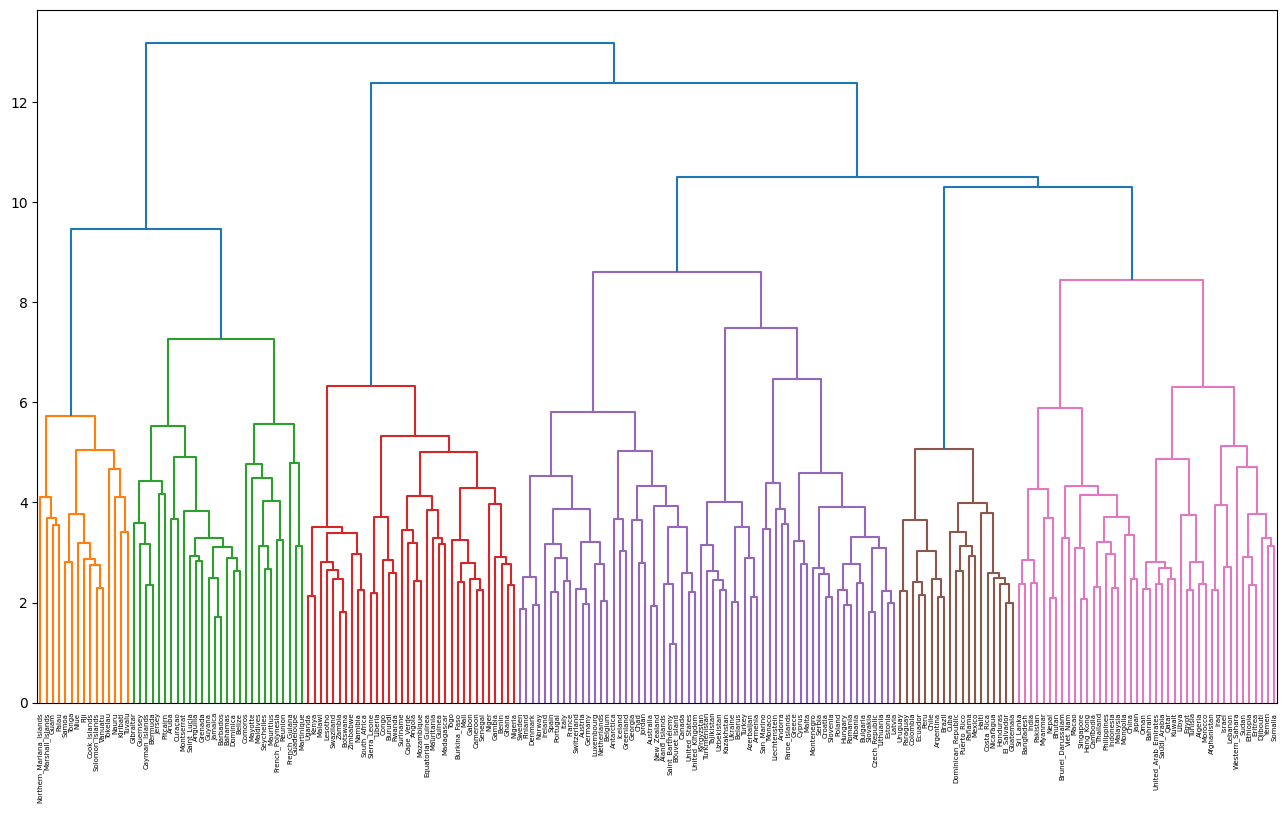

In [22]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram, leaves_list


# クラスタリング
clu = linkage(vectors,'ward')
# 描画領域の定義
plt.figure(num=None, figsize=(16, 9))

# 樹形図の作成・出力
dendrogram(clu, labels=names) #labels=namesでいいのだろうか...順番がごっちゃになってしまうような？
plt.show()



## 69. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

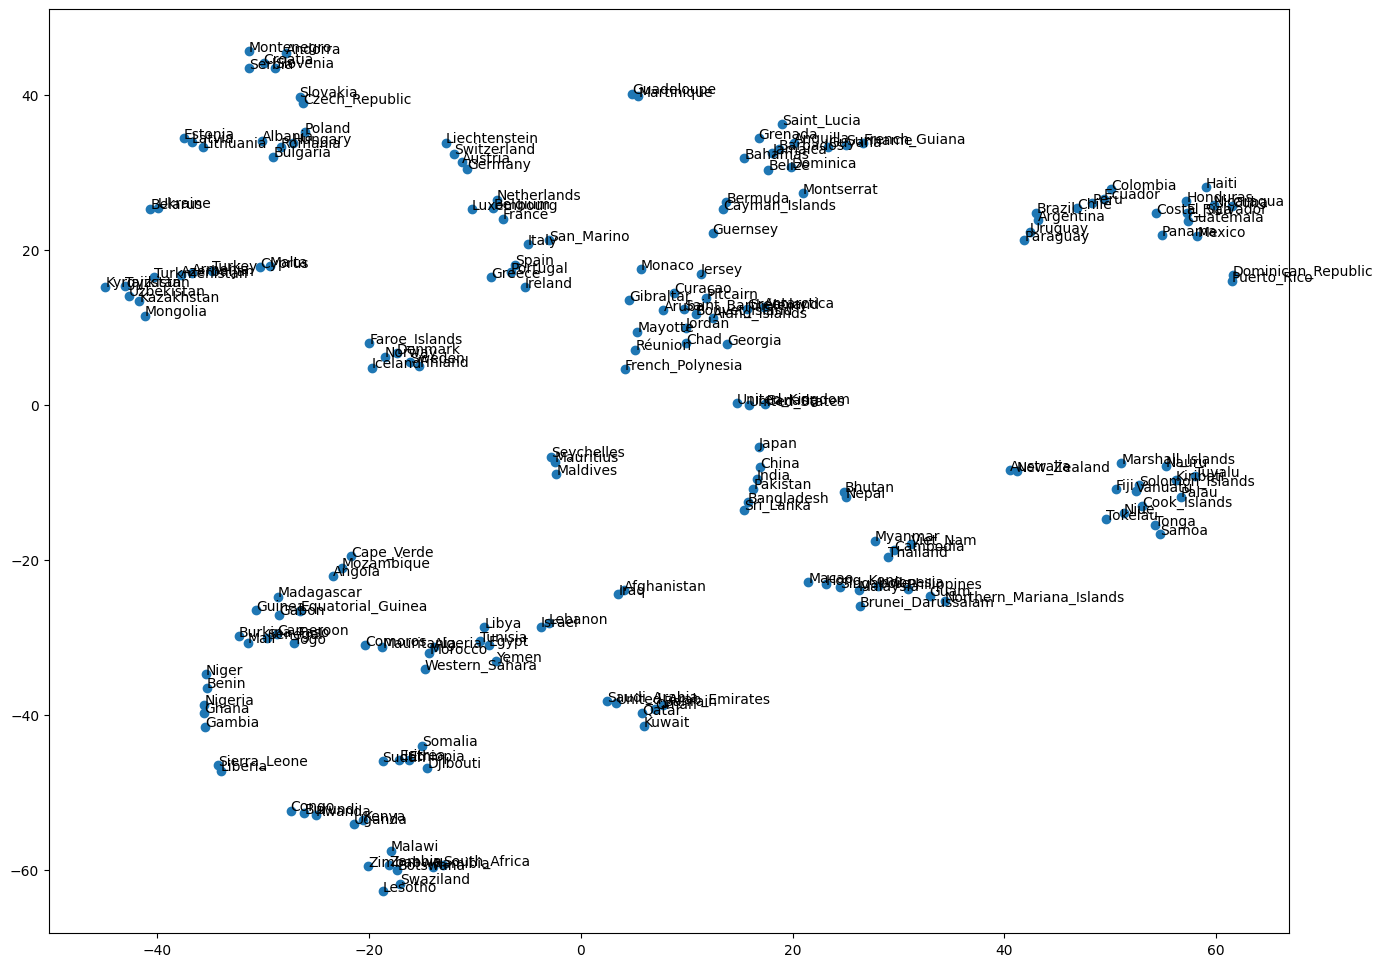

In [45]:
from sklearn.manifold import TSNE

vectors = np.array(vectors)
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(vectors)
X_embedded.shape

# 転置
X_embedded_t = list(zip(*X_embedded))

fig, ax = plt.subplots(figsize=(16, 12))
plt.scatter(*X_embedded_t)
for i, c in enumerate(names):
    ax.annotate(c, (X_embedded[i][0],X_embedded[i][1]))